In [20]:
import numpy as np
import pandas as pd

## Data Handling

In [21]:
#Import csv file from data folder
PriceData = pd.read_csv('../Data/Price.csv')

#Filter all rows that do not equal DE for the column Country
PriceData = PriceData[PriceData['PriceArea'] == 'DE']

#Drop the column PriceDKK
PriceData = PriceData.drop(columns=['PriceDKK'])
#Rename hour DK to Date
PriceData = PriceData.rename(columns={'HourDK': 'Date'})

array([[<Axes: title={'center': 'PriceEUR'}>]], dtype=object)

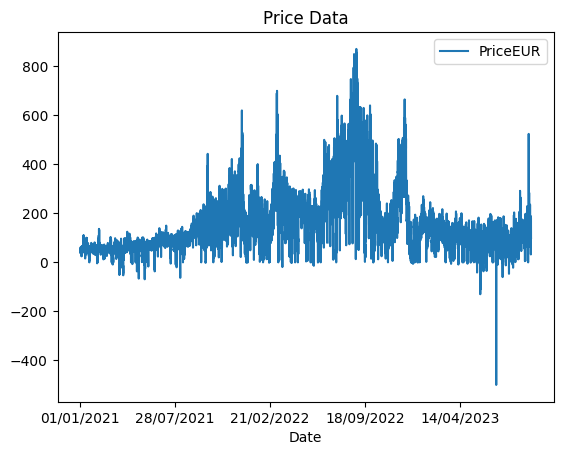

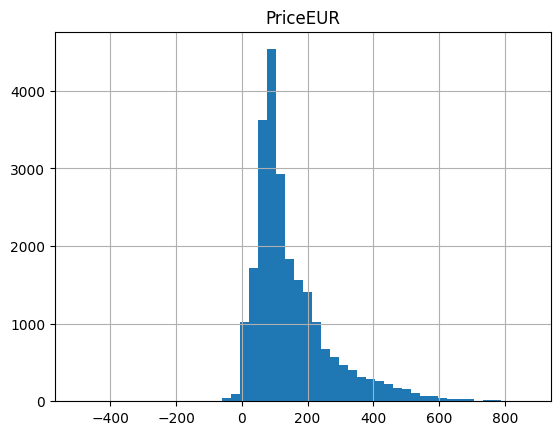

In [22]:
#Plot the price data
PriceData.plot(x='Date', y='PriceEUR', kind='line', title='Price Data')

#Plot the distribution of prices
PriceData.hist(column='PriceEUR', bins=50)


In [23]:

def categorize_prices(df, price_column="PriceEUR"):
    """
    Categorize prices in a DataFrame column into four categories:
    - Negative Prices
    - Low Prices (bottom 33% of non-negative prices)
    - Medium Prices (middle 33% of non-negative prices)
    - High Prices (top 33% of non-negative prices)

    Args:
    - df: Input DataFrame with a column of prices.
    - price_column: Name of the column containing price data (default is "PriceEUR").

    Returns:
    - DataFrame with an additional "Category" column for the price categories.
    """
    # Ensure the column exists
    if price_column not in df.columns:
        raise ValueError(f"Column '{price_column}' not found in the DataFrame.")

    # Extract the price column
    prices = df[price_column]

    # # Separate negative prices
    negative_check = prices < 0

    # Non-negative prices
    non_negative_prices = prices[~negative_check]

    # Calculate quantiles for non-negative prices
    low_threshold = non_negative_prices.quantile(0.33)
    medium_threshold = non_negative_prices.quantile(0.67)

    # Categorize prices
    categories = []
    for price in prices:
        if price < 0:
            categories.append("Negative")
        elif price <= low_threshold:
            categories.append("Low")
        elif price <= medium_threshold:
            categories.append("Medium")
        else:
            categories.append("High")

    # Add the categories as a new column to the DataFrame
    df["Category"] = categories

    return df






In [24]:
# Categorize the prices
PriceData = categorize_prices(PriceData)

In [25]:
def calculate_transition_matrix(df, category_column="Category"):
    """
    Calculate the transition probability matrix for categories.

    Args:
    - df: DataFrame with a sequential column of categories.
    - category_column: Name of the column containing the categories.

    Returns:
    - 4x4 transition probability matrix as a DataFrame.
    """
    # Ensure the column exists
    if category_column not in df.columns:
        raise ValueError(f"Column '{category_column}' not found in the DataFrame.")

    # Extract categories from input df

    categories = df[category_column].unique()
    transitions = df[category_column].values

    # Initialize a 4x4 matrix for counts
    transition_counts = pd.DataFrame(
        np.zeros((len(categories), len(categories))),
        index=categories,
        columns=categories,
    )

    # Count transitions
    for i in range(len(transitions) - 1):
        current_category = transitions[i]
        next_category = transitions[i + 1]
        if current_category in categories and next_category in categories:
            transition_counts.loc[current_category, next_category] += 1

    # Normalize rows to get probabilities
    transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0).fillna(0)

    return transition_matrix






In [26]:
# Calculate transition probabilities
transition_matrix = calculate_transition_matrix(PriceData).to_dict()
